<a href="https://colab.research.google.com/github/Kartik2559/Netflix-EDA/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [ ]:
link = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv'

netflix = pd.read_csv(link)

In [ ]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# there are null values in multiple comuns and the data type of date_added is object, will change it into date type

###Observed that there are some null values in the data so using for loop to find the percentage of missing data in each column.

In [ ]:
for i in netflix.columns:
  null_percentage = (netflix[i].isna().sum()/len(netflix)) * 100
  print(f'Null Percentage of {i} : {round(null_percentage,2)}%')


Null Percentage of show_id : 0.0%
Null Percentage of type : 0.0%
Null Percentage of title : 0.0%
Null Percentage of director : 29.91%
Null Percentage of cast : 9.37%
Null Percentage of country : 9.44%
Null Percentage of date_added : 0.11%
Null Percentage of release_year : 0.0%
Null Percentage of rating : 0.05%
Null Percentage of duration : 0.03%
Null Percentage of listed_in : 0.0%
Null Percentage of description : 0.0%


In [ ]:
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


###Using ydata_profiling for creting a Profile Report. Which is type of summary for the entire data. This helps in better understandng the data in one go.

Have used ProfileReport from ydata_profiling library.

In [ ]:
netflix_profile = ProfileReport(netflix, title = 'Netflix Profiling')
netflix_profile

###There are multiple directors in director column and multiple cast and listed_in too. First will seprate them so that we can find the real numbers for each data analysis we will be doing further.

Unnesting of the director, country, listed_in and cast columns

In [ ]:
director=netflix['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(director, index = netflix['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns = {0:'Director'}, inplace = True)
df1.drop(['level_1'], axis = 1, inplace = True)
df1.head()

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [ ]:
cast = netflix['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast, index = netflix['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns = {0: 'Cast'}, inplace = True)
df2.drop(['level_1'], axis = 1, inplace = True)
df2.head()

,title,Cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
Listed_in = netflix['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(Listed_in, index = netflix['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns = {0: 'Listed_in'}, inplace = True)
df3.drop(['level_1'], axis = 1, inplace = True)
df3.head()

,title,Listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
Country = netflix['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(Country, index = netflix['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns = {0: 'Country'}, inplace = True)
df4.drop(['level_1'], axis = 1, inplace = True)
df4.head()

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


### We have unnested the columns and now e will be merging them to be one dataset

In [ ]:
df5 = df1.merge(df2, on = 'title', how = 'inner')

In [ ]:
df6 = df5.merge(df3, on = 'title', how = 'inner')
df = df6.merge(df4, on = 'title', how = 'inner')
df.head()

,title,Director,Cast,Listed_in,Country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa


### After merging we have to handle the missing data. As we cant deduce the Director and Cast in any way we will fill the nan values to be 'Unknown', and in Country we will leve them to be nan as we will be filling those null values with the mode of the country column.

In [ ]:
df['Director'].replace(['nan'], ['Unknown'], inplace = True)
df['Cast'].replace(['nan'], ['Unknown'], inplace = True)
df['Country'].replace(['nan'], [np.nan], inplace = True)

### After handling the nan values we will be merging the unnested dataset 'df' with the orignal dataset netflis and name it as 'Netflix'.

In [ ]:
Netflix = df.merge(netflix[['title', 'show_id', 'type', 'date_added', 'release_year', 'rating', 'duration']], on = ['title'], how = 'left')

In [ ]:
Netflix.head()

,title,Director,Cast,Listed_in,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


### Lets check null values %age again.

In [ ]:
(Netflix.isna().sum() * 100) / Netflix.shape[0]

title           0.000000
Director        0.000000
Cast            0.000000
Listed_in       0.000000
Country         5.889866
show_id         0.000000
type            0.000000
date_added      0.078221
release_year    0.000000
rating          0.033170
duration        0.001485
dtype: float64

### Null values in 'date_added', 'rating' and 'duration' column cant be filled and are very less in 5age of the data so will be dropping them.

In [ ]:
Netflix.dropna(subset = ['date_added', 'rating', 'duration'], axis = 0, inplace = True)

### Now we are just left with the 'Country' column and we will fill it with the mode.
###Mode is just a maximum occuring value in Country column and we will be using idxmax() function here.

In [ ]:
(Netflix.isna().sum() * 100) / Netflix.shape[0]

title           0.000000
Director        0.000000
Cast            0.000000
Listed_in       0.000000
Country         5.895035
show_id         0.000000
type            0.000000
date_added      0.000000
release_year    0.000000
rating          0.000000
duration        0.000000
dtype: float64

In [ ]:
Netflix['Country'] = Netflix['Country'].fillna(Netflix['Country'].value_counts().idxmax())

In [ ]:
Netflix.head()

,title,Director,Cast,Listed_in,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Unknown,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2
2,Blood & Water,Unknown,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2
3,Blood & Water,Unknown,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2
4,Blood & Water,Unknown,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2


### 'Duration' Column have data in object type and can create an issue while finding an average runtime of a movue or seassons of the TV Show. So we will be splitting the data in this column ans extracting the usful data out of it and make it int.

In [ ]:
Netflix['duration'] = Netflix['duration'].str.split(' ', expand = True)[0].astype(int)

In [ ]:
Netflix.head()

,title,Director,Cast,Listed_in,Country,show_id,type,date_added,release_year,rating,duration,Year_Added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,2021
1,Blood & Water,Unknown,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021
2,Blood & Water,Unknown,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021
3,Blood & Water,Unknown,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021
4,Blood & Water,Unknown,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2,2021


### We do have the date added data of the Movie or TV Show but we can use Year added information in a better way and we will be extracting the year from the Date_Added column.

In [ ]:
Netflix['Year_Added'] = Netflix['date_added'].str.split(', ', expand = True)[1]

### Our Data is devided in to two segments in type column and will be making seprate dataframe for Movie and TV Show as Netflix_Movies and Netflix_TV_Shows respectively

In [ ]:
Netflix_Movies = Netflix[Netflix['type'] == 'Movie']
Netflix_TV_Shows = Netflix[Netflix['type'] == 'TV Show']

# Let's start answering some questions from the data Netflix, Netflix_Movies and Netflix_TV_Shows

* **For separate analysis of movies & TV shows, it is important to first distinguish them. What percentage of titles present in the dataset are TV shows and what percentage of them are movies? (i.e. TV shows: Movies)**

In [ ]:
type_percet = Netflix['type'].value_counts(normalize = True) * 100
print(f'%age of Movies in Netflix are : {round(type_percet[0],2)}% \n%age of TV Shows in Netflix are : {round(type_percet[1],2)}%')


%age of Movies in Netflix are : 72.28% 
%age of TV Shows in Netflix are : 27.72%


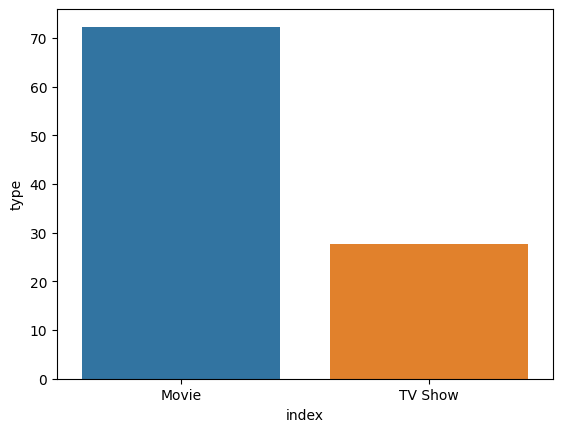

In [ ]:
type_percet = pd.DataFrame(type_percet).reset_index()

sns.barplot(data = type_percet, x = 'index', y = 'type')
plt.show()

* **Different type of genres and %age of content in those genres.**

In [ ]:
Listed_in_percent = Netflix['Listed_in'].value_counts(normalize = True)*100

print(f'Top 5 Genre : \n{round(Listed_in_percent[:5],2)}')

Top 5 Genre : 
Dramas                    14.75
International Movies      13.98
Comedies                  10.32
International TV Shows     6.35
Action & Adventure         6.05
Name: Listed_in, dtype: float64


* **Top 5 leading countries in terms of overall content creation on Netflix?**

This can be biased as we have imputed null values in country column to mode of this column wgich was 'United States'

In [ ]:
countries_contribution_percent = Netflix['Country'].value_counts(normalize = True) * 100
print(f'Top 5 countries : \n{round(countries_contribution_percent[:5],2)}')

Top 5 countries : 
United States     35.27
India             11.31
United Kingdom     6.40
Japan              4.26
France             4.09
Name: Country, dtype: float64


* **Most of the movies available to watch are rated as?**

In [ ]:
movies_mostly_rated = Netflix_Movies['rating'].value_counts(normalize = True) * 100
print(f'Top 3 movies mostly rated : \n{round(movies_mostly_rated[:3],2)}')

Top 3 movies mostly rated : 
TV-MA    30.15
TV-14    20.05
R        17.70
Name: rating, dtype: float64


### Its getting hard to understand this rating. To make it easy to understand lets change the ratings. This is considered by reffering to the internet.

In [ ]:
Netflix['rating'] = Netflix['rating'].replace({'PG-13': 'Teens',
                'TV-MA': 'Adults',
                'PG': 'Kids',
                'TV-14': 'Teens',
                'TV-PG': 'Kids',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids',
                'R': 'Adults',
                'TV-G': 'Kids',
                'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'Adults',
                'UR' : 'Adults',
                'TV-Y7-FV': 'Kids'})

Netflix_Movies['rating'] = Netflix['rating'].replace({'PG-13': 'Teens',
                'TV-MA': 'Adults',
                'PG': 'Kids',
                'TV-14': 'Teens',
                'TV-PG': 'Kids',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids',
                'R': 'Adults',
                'TV-G': 'Kids',
                'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'Adults',
                'UR' : 'Adults',
                'TV-Y7-FV': 'Kids'})

Netflix_TV_Shows['rating'] = Netflix['rating'].replace({'PG-13': 'Teens',
                'TV-MA': 'Adults',
                'PG': 'Kids',
                'TV-14': 'Teens',
                'TV-PG': 'Kids',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids',
                'R': 'Adults',
                'TV-G': 'Kids',
                'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'Adults',
                'UR' : 'Adults',
                'TV-Y7-FV': 'Kids'})

<ipython-input-180-9cc9e2db5936>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_Movies['rating'] = Netflix['rating'].replace({'PG-13': 'Teens',
<ipython-input-180-9cc9e2db5936>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_TV_Shows['rating'] = Netflix['rating'].replace({'PG-13': 'Teens',


* **Let's find 'most of the movies available to watch are rated as' again**

In [ ]:
movies_mostly_rated_simplified = Netflix_Movies['rating'].value_counts(normalize = True) * 100
round(movies_mostly_rated_simplified, 2)

Adults    48.97
Teens     31.19
Kids      19.83
Name: rating, dtype: float64

* **Most of the TV Shows available to watch are rated as?**

In [ ]:
TVShow_mostly_rated_simplified = Netflix_TV_Shows['rating'].value_counts(normalize = True) * 100
round(TVShow_mostly_rated_simplified, 2)

Adults    53.73
Teens     26.14
Kids      20.13
Name: rating, dtype: float64

* **The average duration of movies present on Netflix**

In [ ]:
avg_movie_time = round(Netflix_Movies['duration'].mean(),2)
print(f'Average movie time duration on Netflix: {avg_movie_time} min')

Average movie time duration on Netflix: 106.86 min


* **The average seassons of tv show present on Netflix**

In [ ]:
avg_seassons = np.floor(Netflix_TV_Shows['duration'].mean())
print(f'Average seassons on Netflix: {avg_seassons} Seassons')

Average seassons on Netflix: 1.0 Seassons


# Let's Do some Univariate Analysis

In [ ]:
Netflix_Movies.groupby(['Listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                               ascending=False)[:10]

,Listed_in,title
11,International Movies,2752
7,Dramas,2426
4,Comedies,1674
6,Documentaries,869
0,Action & Adventure,859
10,Independent Movies,756
2,Children & Family Movies,641
15,Romantic Movies,616
19,Thrillers,577
14,Music & Musicals,375


In [ ]:
Netflix_TV_Shows.groupby(['Listed_in']).agg({'title' : 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:10]

,Listed_in,title
5,International TV Shows,1349
15,TV Dramas,762
14,TV Comedies,573
3,Crime TV Shows,469
6,Kids' TV,448
4,Docuseries,394
9,Romantic TV Shows,370
8,Reality TV,255
1,British TV Shows,252
0,Anime Series,174


In [ ]:
Netflix_Movies.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:10]

,Country,title
114,United States,3187
43,India,962
112,United Kingdom,532
20,Canada,319
34,France,303
36,Germany,182
100,Spain,171
51,Japan,119
23,China,114
65,Mexico,111


In [ ]:
Netflix_TV_Shows.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:10]

,Country,title
63,United States,1322
62,United Kingdom,271
30,Japan,197
52,South Korea,170
8,Canada,126
19,France,90
25,India,84
57,Taiwan,70
2,Australia,64
53,Spain,61


In [ ]:
Netflix_Movies.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)

,rating,title
0,Adults,2940
2,Teens,1917
1,Kids,1269


In [ ]:
Netflix_TV_Shows.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)

,rating,title
0,Adults,1149
1,Kids,785
2,Teens,730


In [ ]:
Netflix_Movies.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:10]

,duration,title
84,90,152
91,97,146
87,93,146
88,94,146
85,91,144
89,95,137
90,96,130
86,92,129
96,102,122
92,98,120


In Netflix TV Shows duration is Seassons.

In [ ]:
Netflix_TV_Shows.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:10]

,duration,title
0,1,1791
1,2,421
2,3,198
3,4,94
4,5,64
5,6,33
6,7,23
7,8,17
8,9,9
9,10,6


### Actor with maximum Movies
* **In the following result we can see that unknown no of Actor is having max movie which is cummilative of all the unknown so we will consider the maximum movies are done by Anupam Kher**

Thats why we are taking range from 1:6

In [ ]:
Netflix_Movies.groupby(['Cast']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[1:6]

,Cast,title
2102,Anupam Kher,42
21774,Shah Rukh Khan,35
17187,Naseeruddin Shah,32
18058,Om Puri,30
638,Akshay Kumar,30


### Actor with maximum TV Shows
* **In the following result we can see that unknown no of Actor is having max TV Shows which is cummilative of all the unknown so we will consider the maximum movies are done by Takahiro Sakurai**

Thats why we are taking range from 1:6

In [ ]:
Netflix_TV_Shows.groupby(['Cast']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[1:6]

,Cast,title
13172,Takahiro Sakurai,25
14520,Yuki Kaji,19
6772,Junichi Suwabe,17
2863,Daisuke Ono,17
14504,Yuichi Nakamura,16


### Director with Maximum Movies
* **In the following result we can see that unknown no of director is having max Movies which is cummilative of all the unknown so we will consider the maximum movies are directed by Rajiv Chilaka**

Thats why we are taking range from 1:6

In [ ]:
Netflix_Movies.groupby(['Director']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[1:6]

,Director,title
3580,Rajiv Chilaka,22
1816,Jan Suter,21
3631,Raúl Campos,19
4259,Suhas Kadav,16
2737,Marcus Raboy,15


### Director with maximum TV Shows

* **In the following result we can see that unknown no of director is having max TV Shows which is cummilative of all the unknown so we will consider the maximum tv shows are directed by Ken Burns**

Thats why we are taking range from 1:6

In [ ]:
Netflix_TV_Shows.groupby(['Director']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[1:6]

,Director,title
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
128,Joe Berlinger,2
100,Hsu Fu-chun,2


In [ ]:
Netflix.head(2)

,title,Director,Cast,Listed_in,Country,show_id,type,date_added,release_year,rating,duration,Year_Added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,Documentaries,United States,s1,Movie,"September 25, 2021",2020,Teens,90,2021
1,Blood & Water,Unknown,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,Adults,2,2021


# Univariate analysis for India

* **Most popular Movie genre in India**

In [ ]:
India_Netflix_Movies = Netflix_Movies[Netflix_Movies['Country'] == 'India']

In [ ]:
India_Netflix_Movies.groupby('Listed_in').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:5]

,Listed_in,title
10,International Movies,864
6,Dramas,662
3,Comedies,323
9,Independent Movies,167
0,Action & Adventure,137


* **Most popular TV Show genre in India**

In [ ]:
India_Netflix_TV_Shows = Netflix_TV_Shows[Netflix_TV_Shows['Country'] == 'India']

In [ ]:
India_Netflix_TV_Shows.groupby('Listed_in').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:5]

,Listed_in,title
3,International TV Shows,66
10,TV Dramas,28
9,TV Comedies,26
4,Kids' TV,12
6,Romantic TV Shows,12


* **Year at which max movies were added on Netflix India.**

In [ ]:
Movie_added_india = India_Netflix_Movies.groupby('Year_Added').agg({'title':'nunique'}).reset_index()
Movie_added_india

,Year_Added,title
0,2016,13
1,2017,148
2,2018,332
3,2019,200
4,2020,181
5,2021,88


* **From a line plot we can observe it was 2018**

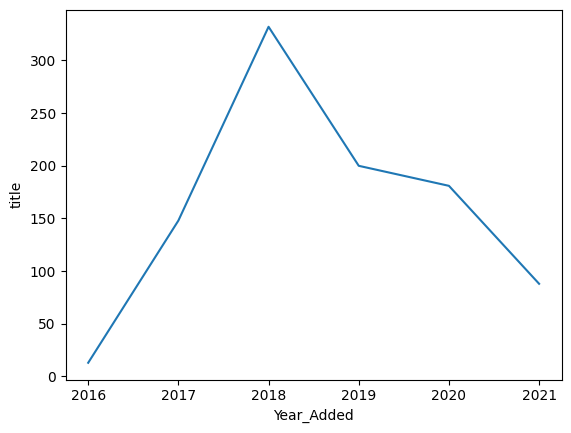

In [ ]:
sns.lineplot(x = 'Year_Added', y = 'title', data = Movie_added_india)
plt.show()

In [ ]:
TVShow_Added_India = India_Netflix_TV_Shows.groupby('Year_Added').agg({'title':'nunique'}).reset_index()
TVShow_Added_India

,Year_Added,title
0,2017,14
1,2018,17
2,2019,18
3,2020,18
4,2021,17


* **From a line plot we can observe that in year 2019 and 2020 equal no of TV Shows were added in Netflix India.**

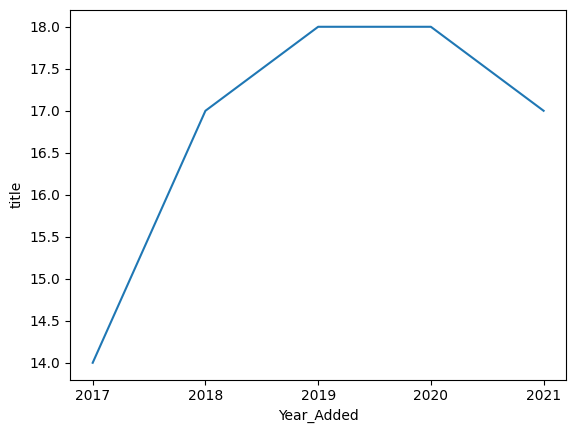

In [ ]:
sns.lineplot(x = 'Year_Added', y = 'title', data = TVShow_Added_India)
plt.show()

### Finding best combination of Cast and Director without concating. But After concating they will look good as they will be in one column.

In [ ]:
India_Netflix_Movies.groupby(['Cast', 'Director']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:5]

,Cast,Director,title
749,Anupam Kher,David Dhawan,6
371,Alok Nath,Sooraj R. Barjatya,5
5437,Salman Khan,Sooraj R. Barjatya,5
3568,Mithun Chakraborty,Umesh Mehra,4
5427,Salman Khan,David Dhawan,4


# Concatinating the Cast and Director to find the best combination in Movies

In [ ]:
India_Netflix_Movies['Cast & Director'] = India_Netflix_Movies.Cast.str.cat(India_Netflix_Movies.Director, sep = ' & ')
India_Netflix_Movies.shape

<ipython-input-255-ffa84bcba63d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  India_Netflix_Movies['Cast & Director'] = India_Netflix_Movies.Cast.str.cat(India_Netflix_Movies.Director, sep = ' & ')


(21411, 13)

**Avoiding the Cast and Director combination whih have any Unknown value**

In [ ]:
Indian_Netflix_Movie_C_D = India_Netflix_Movies[(India_Netflix_Movies['Cast'] != 'Unknown') & (India_Netflix_Movies['Director'] != 'Unknown')]
Indian_Netflix_Movie_C_D.shape

(21268, 13)

In [ ]:
Indian_Netflix_Movie_C_D.groupby('Cast & Director').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:5]

,Cast & Director,title
742,Anupam Kher & David Dhawan,6
369,Alok Nath & Sooraj R. Barjatya,5
5413,Salman Khan & Sooraj R. Barjatya,5
2577,Julie Tejwani & Rajiv Chilaka,4
232,Ajay Devgn & Prakash Jha,4


# Concatinating the Cast and Director to find the best combination in TV Shows

In [ ]:
Netflix_TV_Shows['Cast & Director'] = Netflix_TV_Shows['Cast'].str.cat(Netflix_TV_Shows['Director'], sep = ' & ')
Netflix_TV_Shows.shape

<ipython-input-260-6e06be45f1c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_TV_Shows['Cast & Director'] = Netflix_TV_Shows['Cast'].str.cat(Netflix_TV_Shows['Director'], sep = ' & ')


(55932, 13)

In [ ]:
Netflix_TV_Shows_C_D = Netflix_TV_Shows[(Netflix_TV_Shows['Cast'] != 'Unknown') & (Netflix_TV_Shows['Director'] != 'Unknown')]
Netflix_TV_Shows_C_D.shape

(6596, 13)

In [ ]:
Netflix_TV_Shows_C_D.groupby('Cast & Director').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:5]

,Cast & Director,title
496,David Attenborough & Alastair Fothergill,3
1182,Lee Il-hwa & Shin Won-ho,2
495,Dave Chappelle & Stan Lathan,2
691,Gautham Vasudev Menon & Gautham Vasudev Menon,2
1703,Prakash Raj & Gautham Vasudev Menon,2


#Most popular genre in world.

In [ ]:
Netflix.groupby('Listed_in').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:5]

,Listed_in,title
16,International Movies,2752
12,Dramas,2426
7,Comedies,1674
17,International TV Shows,1349
10,Documentaries,869


In [ ]:
Netflix.to_csv('Netflix.csv', index = False)